In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_parquet("/kaggle/input/storm-and-outage-data-merged/storm_and_outage_merged_2014_2023.parquet")

In [2]:
# Create a new column 'is_storm' based on MAGNITUDE_IMPUTED values
df['is_storm'] = 0
df.loc[df['MAGNITUDE_IMPUTED'] >= 25, 'is_storm'] = 1

# Display counts and percentages of each category
storm_counts = df['is_storm'].value_counts()
storm_percentages = df['is_storm'].value_counts(normalize=True) * 100

# Create a summary dataframe
summary_df = pd.DataFrame({
    'Count': storm_counts,
    'Percentage': storm_percentages.round(2)
})

print("Storm classification summary:")
print(summary_df)

Storm classification summary:
           Count  Percentage
is_storm                    
0         211744       52.02
1         195267       47.98


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
"""
Task:
Prepare data for training a machine learning model to classify storm severity based on imputed magnitude values.

Steps:
1. Filter dataset to include only storm events (`is_storm` == 1) and create a copy.
2. Create `severity_class` column if not present:
   - Compute 33rd and 66th percentiles of `MAGNITUDE_IMPUTED` as thresholds.
   - Classify storms as Low (0), Moderate (1), or High (2) based on thresholds.
3. Encode `severity_class` into numerical labels using `LabelEncoder`.
4. Select relevant features for modeling (e.g., deaths, injuries, damages, outages, duration).
5. Scale features using `StandardScaler`.
6. Split data into training and testing sets (80-20 split) with stratification to maintain class balance.

Notes:
- Assumes input dataset (`df`) contains `is_storm`, `MAGNITUDE_IMPUTED`, and feature columns.
- Stratified split ensures proportional representation of severity classes in train/test sets.
- Output includes scaled features (`X_train`, `X_test`) and encoded labels (`y_train`, `y_test`).
"""
# Filter rows where is_storm is 1 and make a copy
storm_df = df[df['is_storm'] == 1].copy()

# Create severity_class if not already present
if 'severity_class' not in storm_df.columns:
    low_thres = storm_df['MAGNITUDE_IMPUTED'].quantile(0.33)
    high_thres = storm_df['MAGNITUDE_IMPUTED'].quantile(0.66)

    def classify(score):
        if score <= low_thres:
            return 0  # Low
        elif score <= high_thres:
            return 1  # Moderate
        else:
            return 2  # High

    storm_df['severity_class'] = storm_df['MAGNITUDE_IMPUTED'].apply(classify)

# Encode labels
label_encoder = LabelEncoder()
storm_df['severity_encoded'] = label_encoder.fit_transform(storm_df['severity_class'])

# Select features
features = ['DEATHS_INDIRECT', 'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
            'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'customers_out', 'duration_hours']

X = storm_df[features]
y = storm_df['severity_encoded']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

In [4]:
df.head()

,customers_out,power_outage_datetime,storm_start_datetime_est,storm_end_datetime_est,duration_hours,STATE,STATE_FIPS,EVENT_TYPE,CZ_TYPE,CZ_FIPS,...,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE_IMPUTED,MAGNITUDE_TYPE_IMPUTED,is_storm
0,4.0,2014-11-23 12:15:00,2014-11-23 12:05:00,2014-11-23 12:25:00,0.333333,ALABAMA,1.0,Thunderstorm Wind,C,45.0,...,0.0,0.0,0.0,0.0,3000.0,0.0,Emergency Manager,55.00000,EG,1
1,65.0,2014-12-23 15:45:00,2014-12-23 15:44:00,2014-12-23 15:45:00,0.016667,ALABAMA,1.0,Thunderstorm Wind,C,119.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Amateur Radio,50.00000,EG,1
2,53.0,2014-12-23 17:00:00,2014-12-23 17:00:00,2014-12-23 19:30:00,2.500000,ALABAMA,1.0,Flash Flood,C,75.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Emergency Manager,0.92894,MS,0
3,47.0,2014-12-23 17:15:00,2014-12-23 17:00:00,2014-12-23 19:30:00,2.500000,ALABAMA,1.0,Flash Flood,C,75.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Emergency Manager,0.92894,MS,0
4,33.0,2014-12-23 19:30:00,2014-12-23 19:30:00,2014-12-23 19:31:00,0.016667,ALABAMA,1.0,Thunderstorm Wind,C,3.0,...,0.0,0.0,0.0,0.0,1000.0,0.0,Public,45.00000,EG,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407011 entries, 0 to 407010
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   customers_out             407011 non-null  float64       
 1   power_outage_datetime     407011 non-null  datetime64[ns]
 2   storm_start_datetime_est  407011 non-null  datetime64[ns]
 3   storm_end_datetime_est    407011 non-null  datetime64[ns]
 4   duration_hours            407011 non-null  float64       
 5   STATE                     407011 non-null  object        
 6   STATE_FIPS                407011 non-null  float64       
 7   EVENT_TYPE                407011 non-null  object        
 8   CZ_TYPE                   407011 non-null  object        
 9   CZ_FIPS                   407011 non-null  float64       
 10  CZ_NAME                   407011 non-null  object        
 11  WFO                       407011 non-null  object        
 12  IN

# Model 1: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
"""
Task:
Train and evaluate a Logistic Regression model to classify storm severity using preprocessed features and visualize the results.

Steps:
1. Initialize and train a Logistic Regression model
2. Predict severity classes 
3. Print classification metrics (precision, recall, F1-score) using `classification_report`.
4. Compute and print the confusion matrix.
5. Visualize the confusion matrix as a heatmap with annotations, using `seaborn` and `matplotlib`.


"""
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.37      0.15      0.21     12916
           1       0.18      0.01      0.02     12957
           2       0.33      0.84      0.48     13181

    accuracy                           0.33     39054
   macro avg       0.29      0.33      0.24     39054
weighted avg       0.29      0.33      0.24     39054

Confusion Matrix (Numerical):
[[ 1887   267 10762]
 [ 1493   148 11316]
 [ 1749   403 11029]]


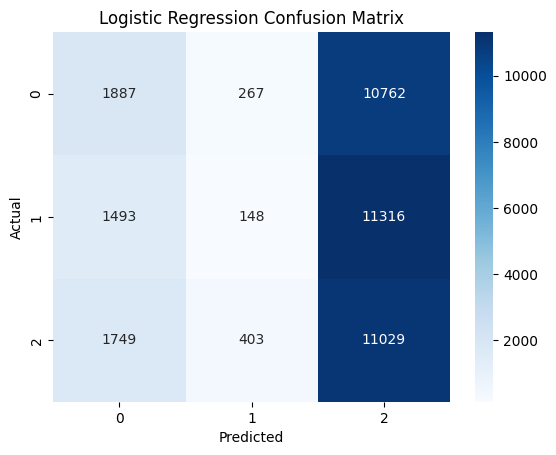

In [12]:
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:")
print(cm_lr)

sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Model 2: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
"""
Task:
Train and evaluate a Random Forest Classifier to classify storm severity using preprocessed features and visualize the results. (This is our best original attempt.)

Steps:
1. Initialize and train a Random Forest Classifier 
2. Predict severity classes for the test set.
3. Print classification metrics (precision, recall, F1-score) 
4. Compute and print the confusion matrix.



"""
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [7]:
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Random Forest Results:
              precision    recall  f1-score   support

           0       0.62      0.65      0.63     12916
           1       0.58      0.56      0.57     12957
           2       0.59      0.58      0.58     13181

    accuracy                           0.60     39054
   macro avg       0.59      0.60      0.59     39054
weighted avg       0.59      0.60      0.59     39054

Confusion Matrix:
[[8409 2241 2266]
 [2694 7253 3010]
 [2556 3039 7586]]


NameError: name 'sns' is not defined

# Model 3: LightGBM

In [15]:
import lightgbm as lgb

lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008744 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 876
[LightGBM] [Info] Number of data points in the train set: 156213, number of used features: 8
[LightGBM] [Info] Start training from score -1.106459
[LightGBM] [Info] Start training from score -1.103348
[LightGBM] [Info] Start training from score -1.086150


LightGBM Results:
              precision    recall  f1-score   support

           0       0.51      0.59      0.55     12916
           1       0.55      0.36      0.43     12957
           2       0.46      0.55      0.50     13181

    accuracy                           0.50     39054
   macro avg       0.51      0.50      0.49     39054
weighted avg       0.51      0.50      0.49     39054

Confusion Matrix
[[7650 1352 3914]
 [3864 4610 4483]
 [3552 2412 7217]]


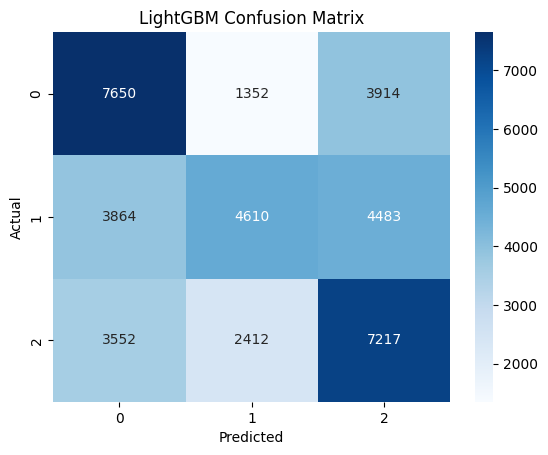

In [17]:
print("LightGBM Results:")
print(classification_report(y_test, y_pred_lgbm))

cm_lgb = confusion_matrix(y_test, y_pred_lgbm)
print("Confusion Matrix")
print(cm_lgb)
sns.heatmap(cm_lgb, annot=True, fmt="d", cmap="Blues")
plt.title("LightGBM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Model 4: XGBoost

In [20]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    print("COnfusion MAtrix:")
    print(cm)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{title} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

XGBoost Results:
              precision    recall  f1-score   support

           0       0.52      0.59      0.55     12916
           1       0.54      0.41      0.47     12957
           2       0.48      0.53      0.50     13181

    accuracy                           0.51     39054
   macro avg       0.51      0.51      0.51     39054
weighted avg       0.51      0.51      0.51     39054

COnfusion MAtrix:
[[7671 1745 3500]
 [3721 5347 3889]
 [3434 2819 6928]]


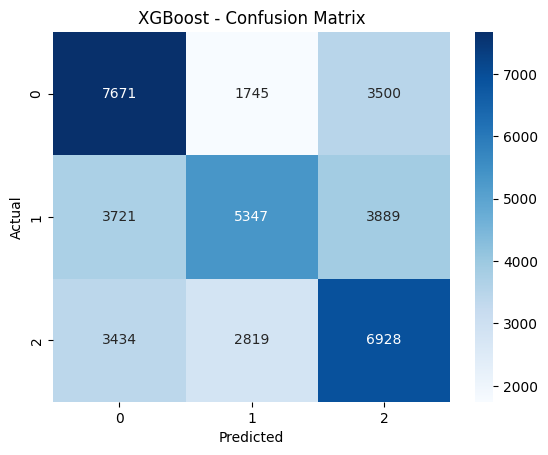

In [21]:
print("XGBoost Results:")
print(classification_report(y_test, y_pred_xgb, target_names=[str(cls) for cls in label_encoder.classes_]))
plot_conf_matrix(y_test, y_pred_xgb, "XGBoost")

# Model 5: CatBoost

In [22]:
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(verbose=0)
catboost.fit(X_train, y_train)
y_pred_cb = catboost.predict(X_test)

CatBoost Results:
              precision    recall  f1-score   support

           0       0.52      0.60      0.56     12916
           1       0.54      0.41      0.47     12957
           2       0.49      0.53      0.51     13181

    accuracy                           0.51     39054
   macro avg       0.52      0.51      0.51     39054
weighted avg       0.52      0.51      0.51     39054

COnfusion MAtrix:
[[7756 1658 3502]
 [3821 5279 3857]
 [3379 2794 7008]]


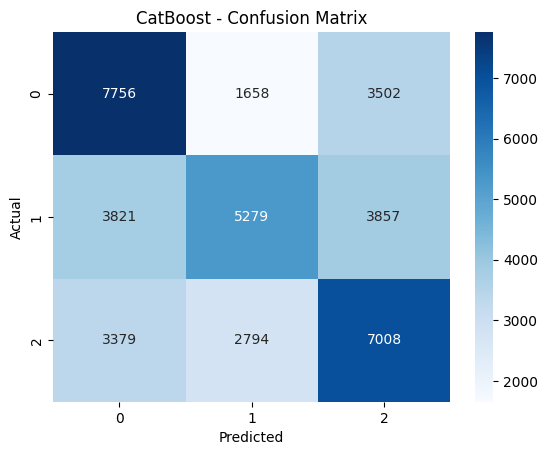

In [23]:
print("CatBoost Results:")
print(classification_report(y_test, y_pred_cb, target_names=[str(cls) for cls in label_encoder.classes_]))
plot_conf_matrix(y_test, y_pred_cb, "CatBoost")

# Neural Net

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import kerastuner as kt  # Make sure Keras Tuner is installed
"""
Task:
Train and evaluate a neural network with hyperparameter tuning to classify storm severity, visualizing performance metrics.

Approach:
Use Keras Tuner to optimize a neural network's architecture and learning rate, employing RandomSearch to maximize validation accuracy. Train with early stopping, evaluate the best model, and visualize training history and confusion matrix.


"""
# Assume X_train, X_test, y_train, y_test are already defined (from your preprocessing)
num_features = X_train.shape[1]
num_classes = len(np.unique(y_train))  # e.g., 3 for your low/moderate/high classes

def build_model(hp):
    model = Sequential()
    # Tune the number of units for the first layer: between 64 and 256 in steps of 32
    model.add(Dense(units=hp.Int('units_input', min_value=64, max_value=256, step=32),
                    activation='relu', input_shape=(num_features,)))
    model.add(BatchNormalization())
    # Tune dropout rate for the input layer
    model.add(Dropout(rate=hp.Float('dropout_input', min_value=0.2, max_value=0.5, step=0.1)))
    
    # Tune the number of additional hidden layers: 1 to 3 layers
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=128, step=32),
                        activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.2, max_value=0.5, step=0.1)))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    # Tune the learning rate for the optimizer.
    learning_rate = hp.Float('lr', min_value=1e-4, max_value=1e-2, sampling='log')
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Set up EarlyStopping to avoid overfitting during tuning
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Initialize the tuner: here we use RandomSearch over the hyperparameter space
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Number of different models to try
    executions_per_trial=1,  # You can increase this to average results over several runs
    directory='my_dir',
    project_name='storm_nn_tuning'
)

# Search for the best hyperparameter configuration.
tuner.search(X_train, y_train,
             epochs=50,
             validation_split=0.2,
             callbacks=[early_stop],
             batch_size=64,
             verbose=1)

# Retrieve the best model.
best_model = tuner.get_best_models(num_models=1)[0]
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best hyperparameters found:")
print(f"  units_input: {best_hp.get('units_input')}")
print(f"  dropout_input: {best_hp.get('dropout_input')}")
print(f"  num_layers: {best_hp.get('num_layers')}")
for i in range(best_hp.get('num_layers')):
    print(f"  units_{i}: {best_hp.get(f'units_{i}')}, dropout_{i}: {best_hp.get(f'dropout_{i}')}")
print(f"  Learning rate: {best_hp.get('lr')}")

# Evaluate the best model on the test set.
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy of Best Model: {test_acc:.4f}")

# Plot training history (using the best model's history if available)
# Here, we retrain the best model with the found hyperparameters for visualization.
history = best_model.fit(X_train, y_train,
                          validation_split=0.2,
                          epochs=50,
                          batch_size=64,
                          callbacks=[early_stop],
                          verbose=1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Predictions and classification report for the best model.
y_pred_nn = np.argmax(best_model.predict(X_test), axis=1)
print("Neural Network Classification Report (Best Model):")
print(classification_report(y_test, y_pred_nn))

# Plot confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, fmt="d", cmap="Blues")
plt.title("Neural Network Confusion Matrix (Best Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Trial 2 Complete [00h 00m 54s]
val_accuracy: 0.3593764901161194

Best val_accuracy So Far: 0.44166693091392517
Total elapsed time: 00h 02m 00s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
128               |192               |units_input
0.2               |0.2               |dropout_input
2                 |2                 |num_layers
32                |32                |units_0
0.3               |0.3               |dropout_0
0.00083336        |0.0017099         |lr
128               |32                |units_1
0.3               |0.2               |dropout_1
32                |None              |units_2
0.3               |None              |dropout_2

Epoch 1/50
1953/1953 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.3777 - loss: 1.2167 - val_accuracy: 0.3599 - val_loss: 1.0953
Epoch 2/50
1953/1953 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4222 - loss: 1.0683 - val_accuracy: 0.3596 - val_loss: 1.1020
Epoch 3/50
1953/1953 ━━━━━━━━━━━━━━━━━━━━ 

KeyboardInterrupt: 

# Very basic RF + XGB Ensemble

Stacking Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.65      0.64     12916
           1       0.59      0.56      0.58     12957
           2       0.59      0.59      0.59     13181

    accuracy                           0.60     39054
   macro avg       0.60      0.60      0.60     39054
weighted avg       0.60      0.60      0.60     39054



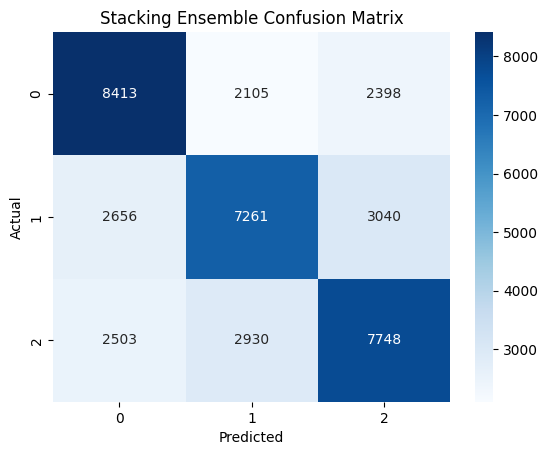

In [ ]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
"""
Task:
Train and evaluate a stacking ensemble classifier combining Random Forest and XGBoost for storm severity classification, visualizing performance metrics. We tried an RF+XGB ensemble.

Approach:
Use a stacking classifier with Random Forest and XGBoost as base models and Logistic Regression as the meta-model. Train the ensemble, predict on the test set, and visualize the confusion matrix.


"""
# Define the base models
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
]

# Define the stacking classifier with a logistic regression meta-model
stacking_model = StackingClassifier(estimators=base_estimators,
                                    final_estimator=LogisticRegression(),
                                    cv=5)

# Train the stacking ensemble
stacking_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_stack = stacking_model.predict(X_test)
print("Stacking Ensemble Classification Report:")
print(classification_report(y_test, y_pred_stack))

# Plot confusion matrix
cm_stack = confusion_matrix(y_test, y_pred_stack)
sns.heatmap(cm_stack, annot=True, fmt="d", cmap="Blues")
plt.title("Stacking Ensemble Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# RF + Feature Engineering

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Enhanced Random Forest Results:
              precision    recall  f1-score   support

           0       0.62      0.60      0.61     26873
           1       0.62      0.56      0.59     26920
           2       0.61      0.69      0.65     27610

    accuracy                           0.62     81403
   macro avg       0.62      0.62      0.62     81403
weighted avg       0.62      0.62      0.62     81403

Confusion Matrix:
[[16160  4907  5806]
 [ 5639 14994  6287]
 [ 4435  4130 19045]]


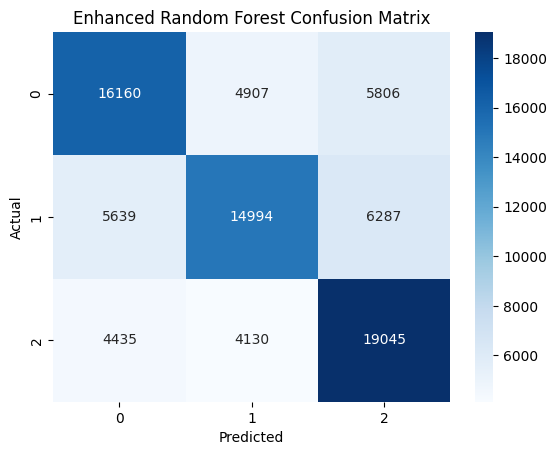

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load data (adjust path as needed)
df = pd.read_parquet("/kaggle/input/storm-and-outage-data-merged/storm_and_outage_merged_2014_2023.parquet")
"""
Task:
Train and evaluate an enhanced Random Forest Classifier for storm severity classification with feature engineering and hyperparameter tuning, visualizing performance metrics.

Approach:
Load merged storm and outage data, create an `is_storm` indicator, and classify storm severity based on `MAGNITUDE_IMPUTED`. Engineer new features, scale data, and split into train/test sets. Use GridSearchCV to tune a Random Forest model, evaluate performance, and visualize the confusion matrix.


"""
# Create 'is_storm' column
df['is_storm'] = 0
df.loc[df['MAGNITUDE_IMPUTED'] > 0, 'is_storm'] = 1  # Assuming > 0 indicates a storm

# Filter storm data
storm_df = df[df['is_storm'] == 1].copy()

# Define severity class if not present
if 'severity_class' not in storm_df.columns:
    low_thres = storm_df['MAGNITUDE_IMPUTED'].quantile(0.33)
    high_thres = storm_df['MAGNITUDE_IMPUTED'].quantile(0.66)
    def classify(score):
        if score <= low_thres:
            return 0  # Low
        elif score <= high_thres:
            return 1  # Moderate
        else:
            return 2  # High
    storm_df['severity_class'] = storm_df['MAGNITUDE_IMPUTED'].apply(classify)

# Encode severity class
storm_df['severity_encoded'] = storm_df['severity_class']

# Feature engineering
storm_df['total_deaths'] = storm_df['DEATHS_DIRECT'] + storm_df['DEATHS_INDIRECT']
storm_df['total_injuries'] = storm_df['INJURIES_DIRECT'] + storm_df['INJURIES_INDIRECT']
storm_df['total_damage'] = storm_df['DAMAGE_PROPERTY'] + storm_df['DAMAGE_CROPS']
storm_df['customer_hours'] = storm_df['customers_out'] * storm_df['duration_hours']

# Updated feature list
features = [
    'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'INJURIES_DIRECT', 'INJURIES_INDIRECT',
    'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'customers_out', 'duration_hours',
    'total_deaths', 'total_injuries', 'total_damage', 'customer_hours'
]

# Prepare data
X = storm_df[features]
y = storm_df['severity_encoded']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

# Initialize and tune Random Forest
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict and evaluate
y_pred_rf = best_rf.predict(X_test)
print("Enhanced Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm_rf)

# Visualize confusion matrix
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Enhanced Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Years extracted from power_outage_datetime:
YEAR
2014     4633
2015    38725
2016    35314
2017    38048
2018    52189
2019    50349
2020    42886
2021    46219
2022    51072
2023    47576
Name: count, dtype: int64

Prediction Summary:
Actual vs Predicted Counts:
Predicted      0      1      2
Actual                        
0          53726   5343   5511
1           7225  50680   6877
2           6982   7549  51374

Accuracy: 0.7977794507008352
Years in the dataset: [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
Creating map for year 2014...


<ipython-input-13-fb4fdf0af419>:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


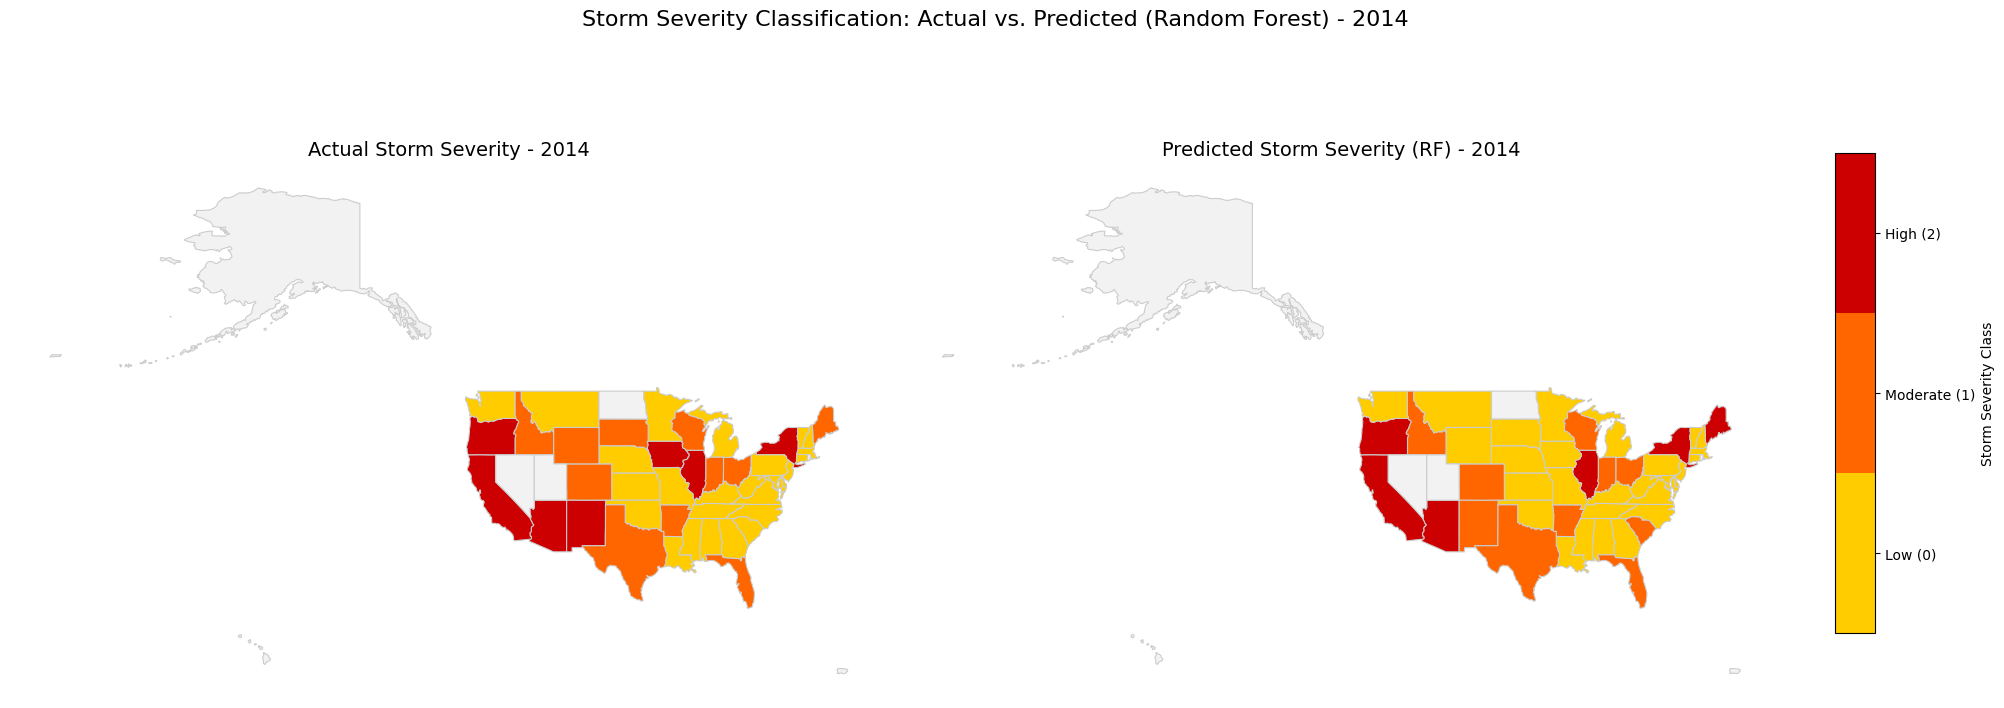

Creating map for year 2015...


<ipython-input-13-fb4fdf0af419>:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


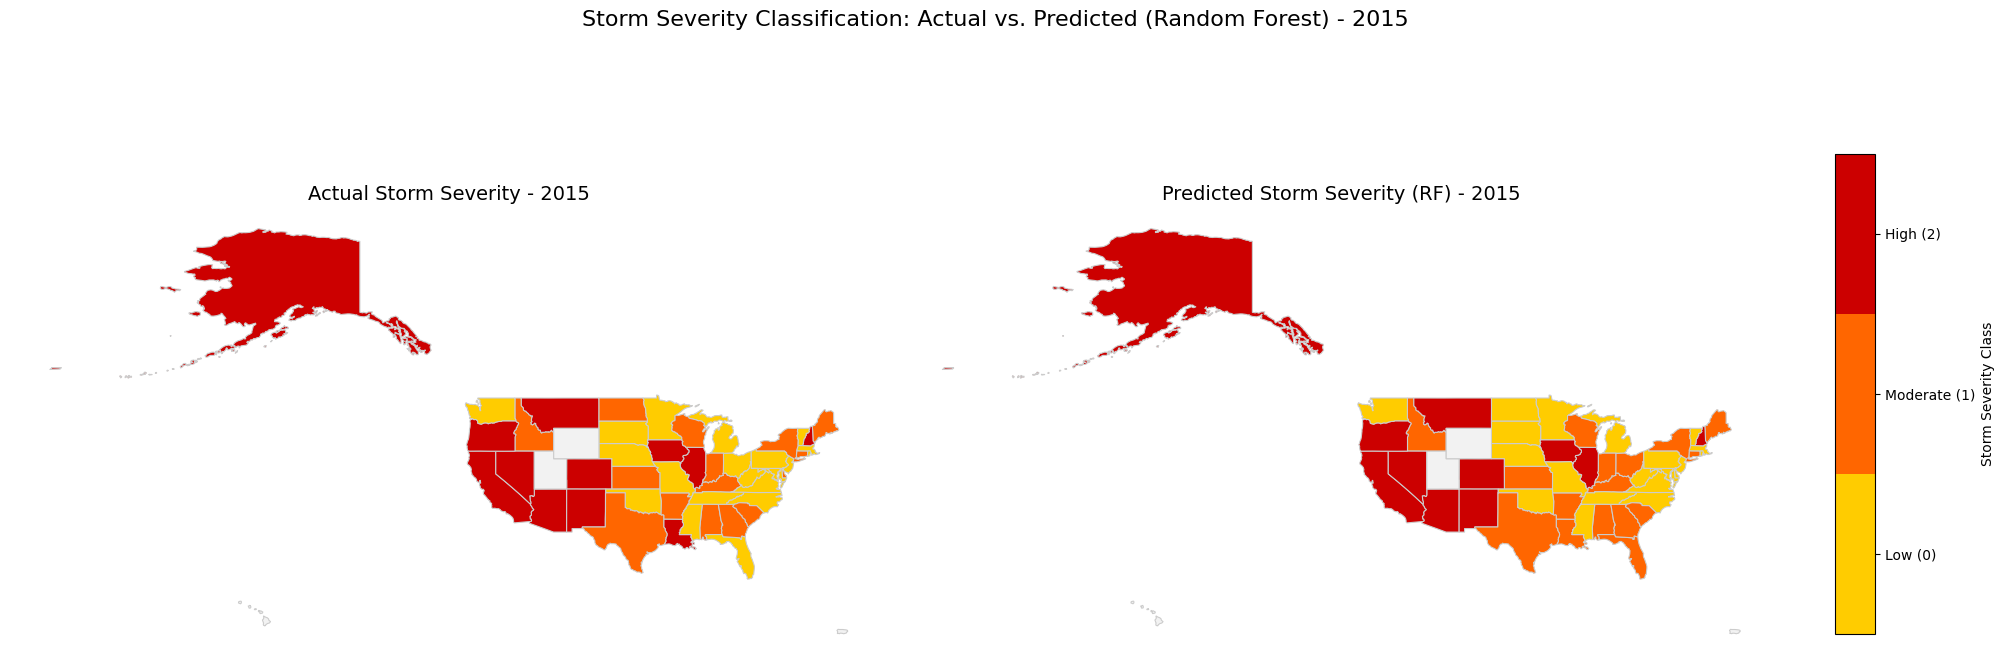

Creating map for year 2016...


<ipython-input-13-fb4fdf0af419>:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


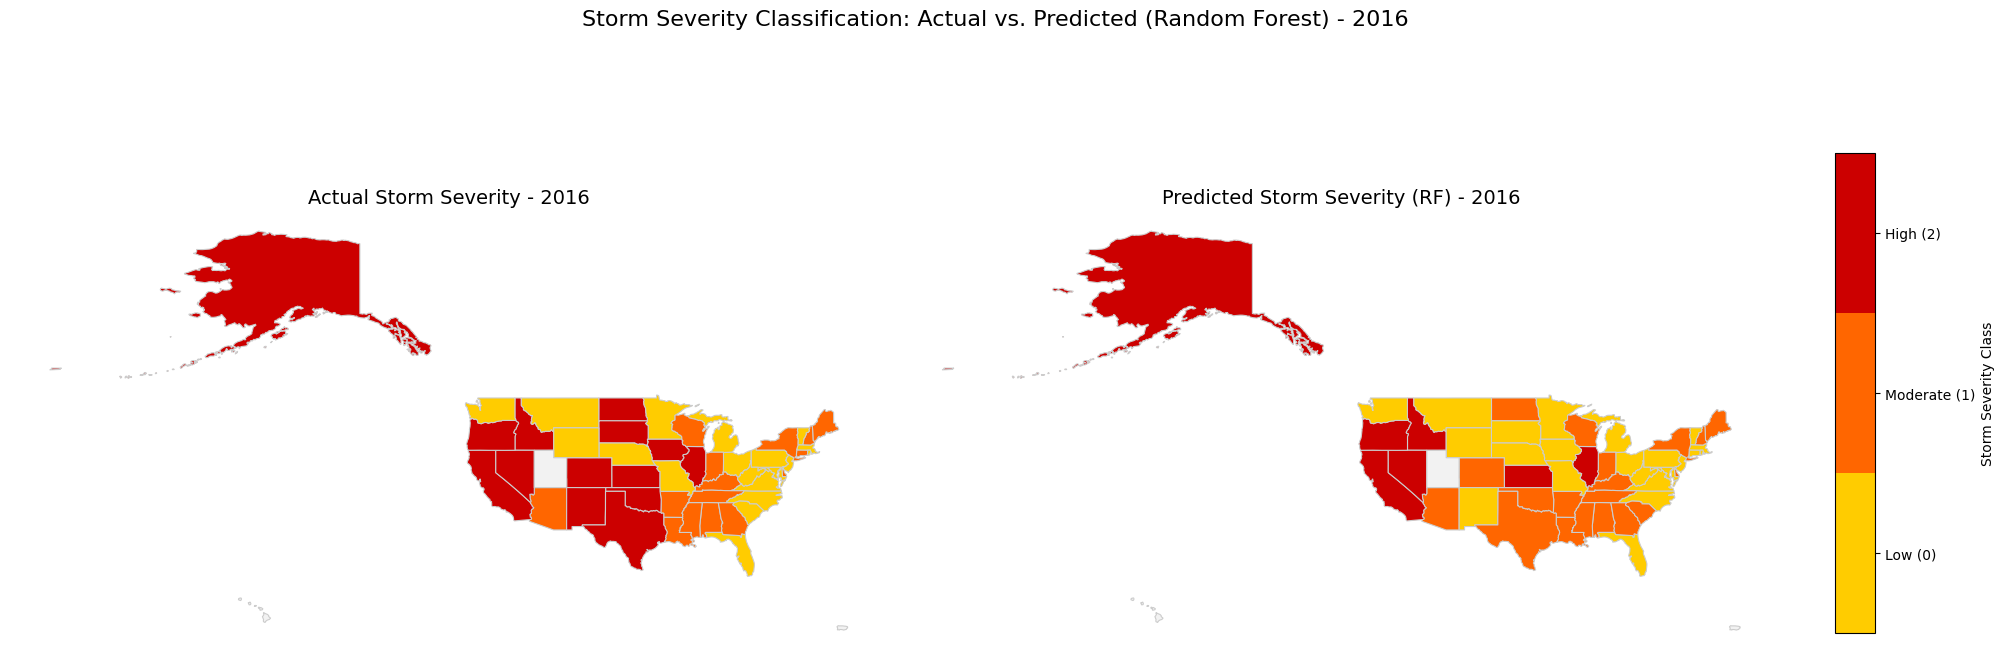

Creating map for year 2017...


<ipython-input-13-fb4fdf0af419>:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


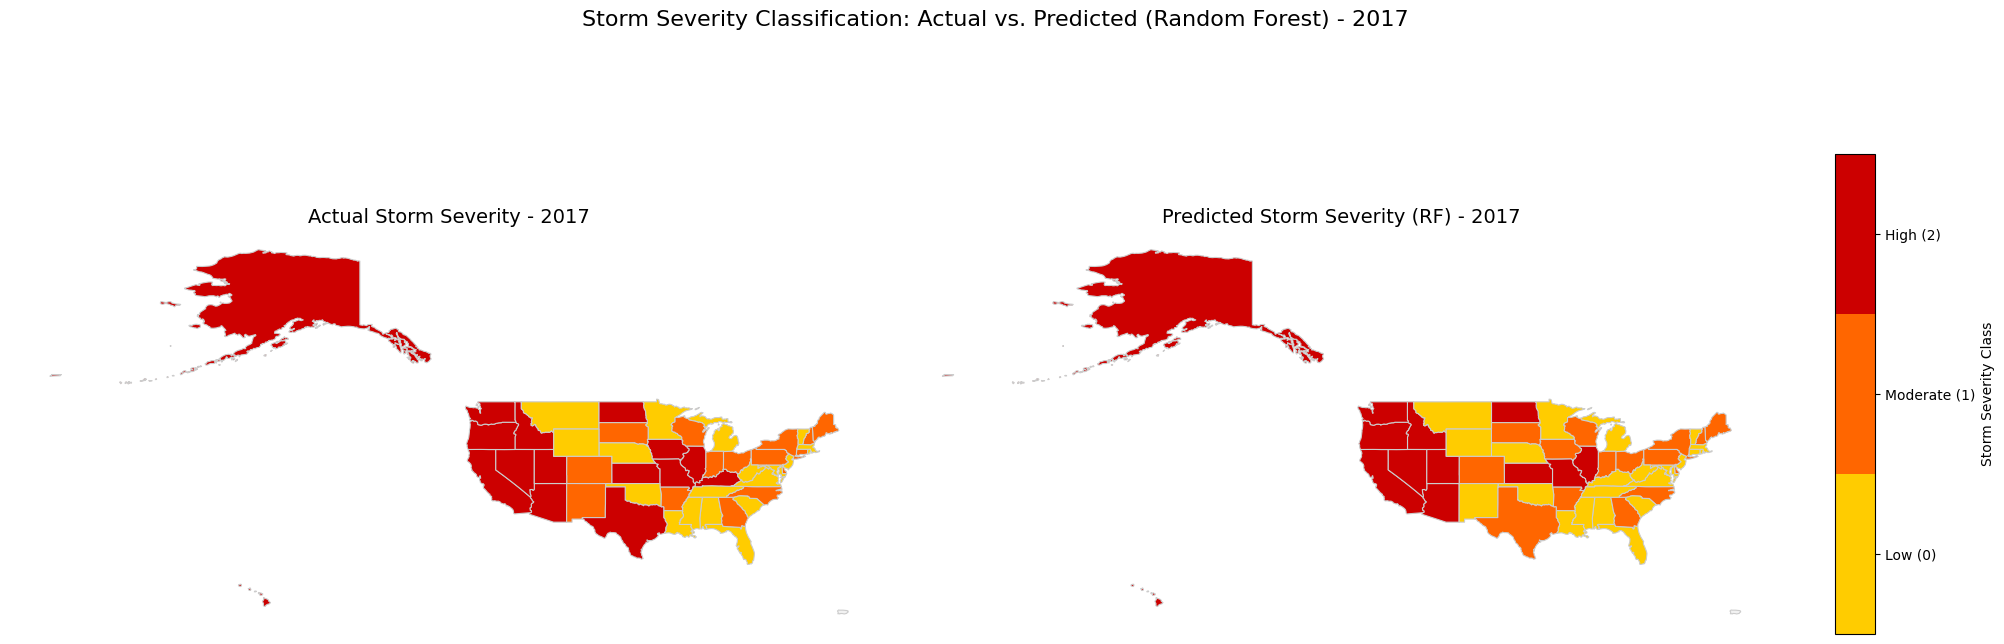

Creating map for year 2018...


<ipython-input-13-fb4fdf0af419>:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


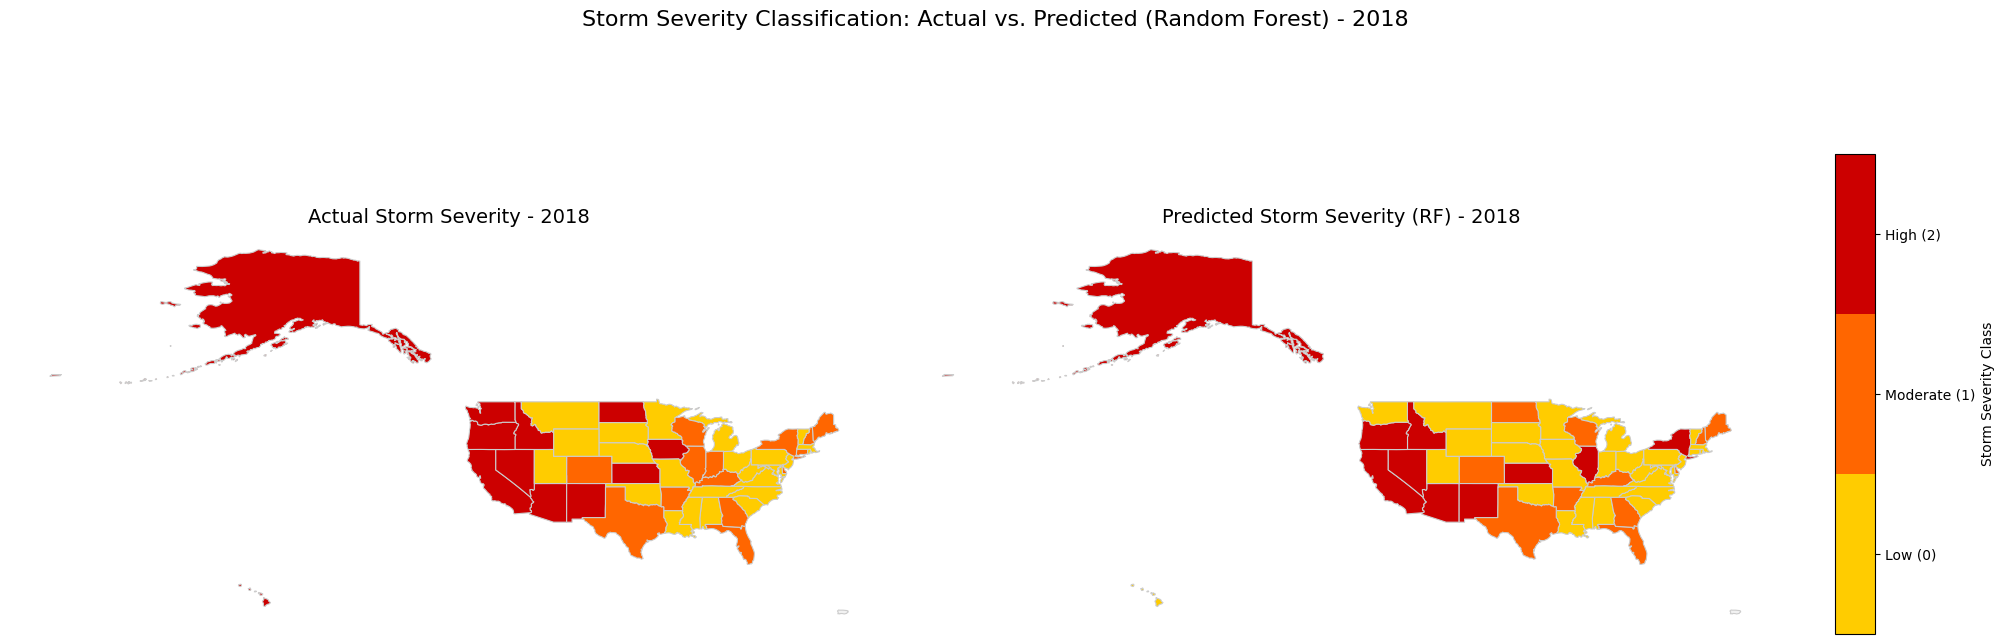

Creating map for year 2019...


<ipython-input-13-fb4fdf0af419>:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


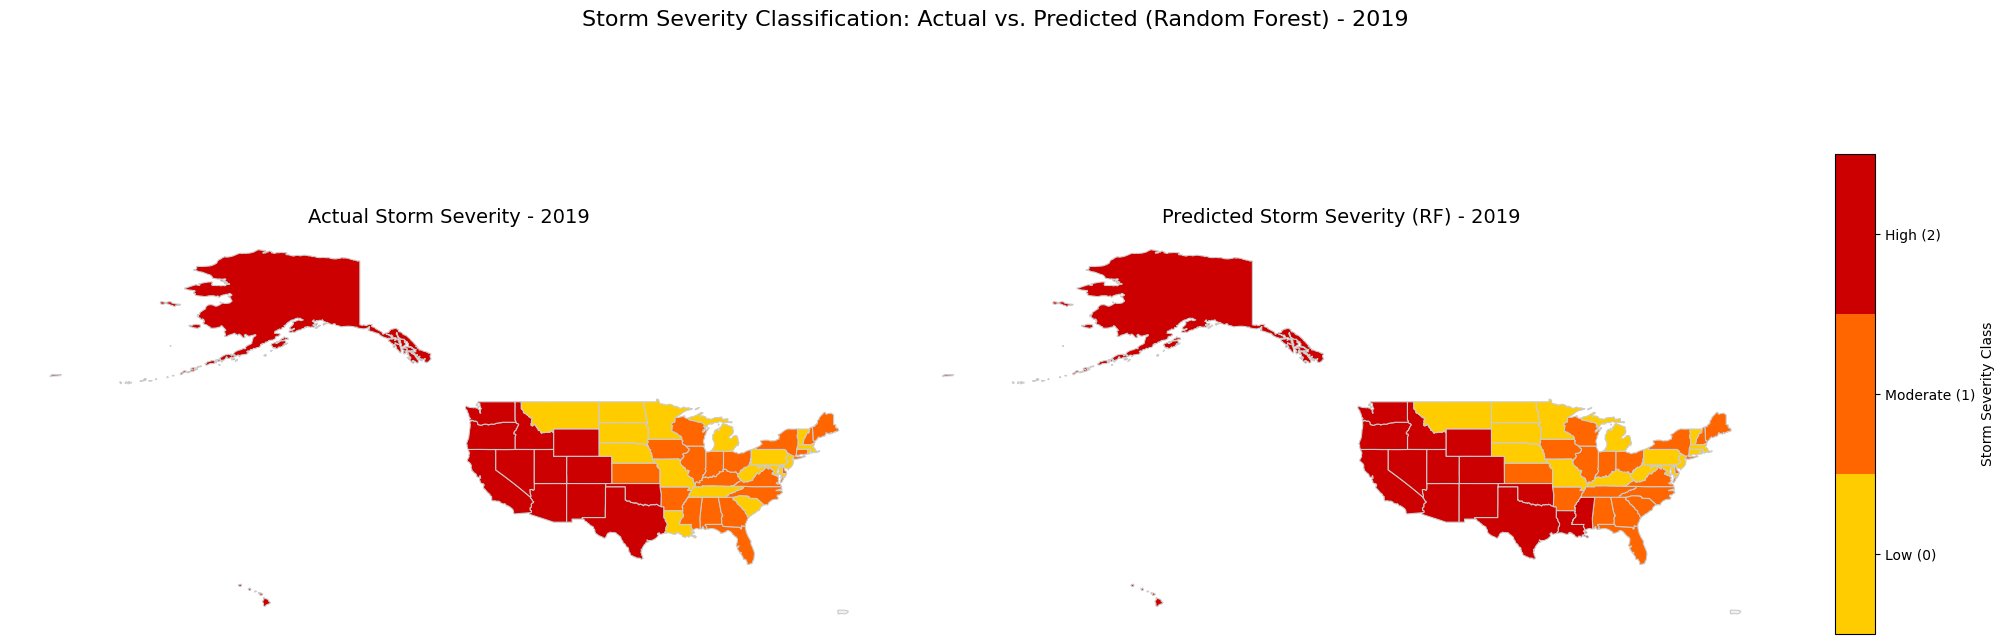

Creating map for year 2020...


<ipython-input-13-fb4fdf0af419>:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


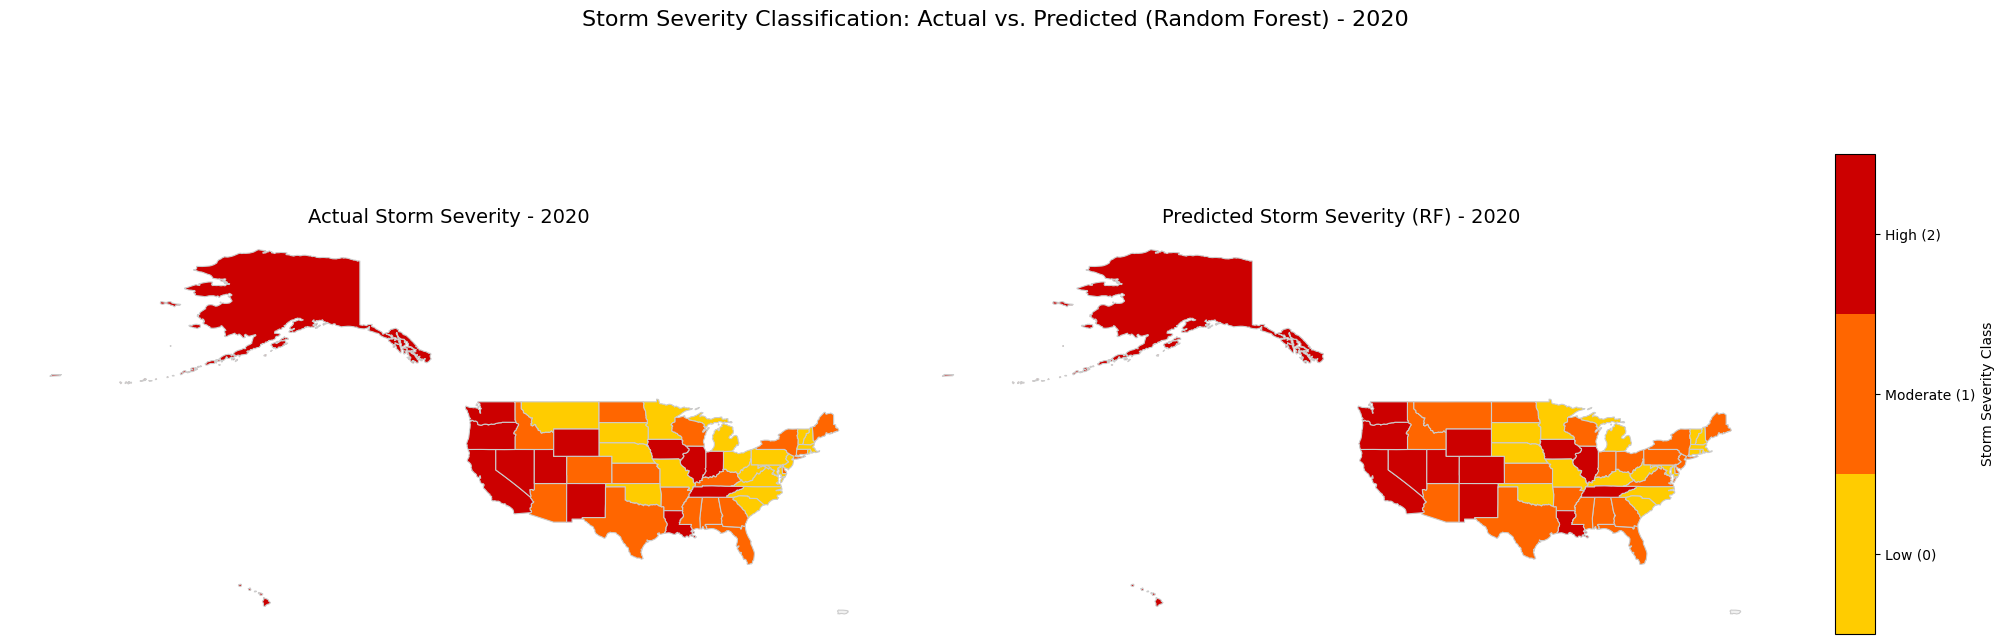

Creating map for year 2021...


<ipython-input-13-fb4fdf0af419>:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


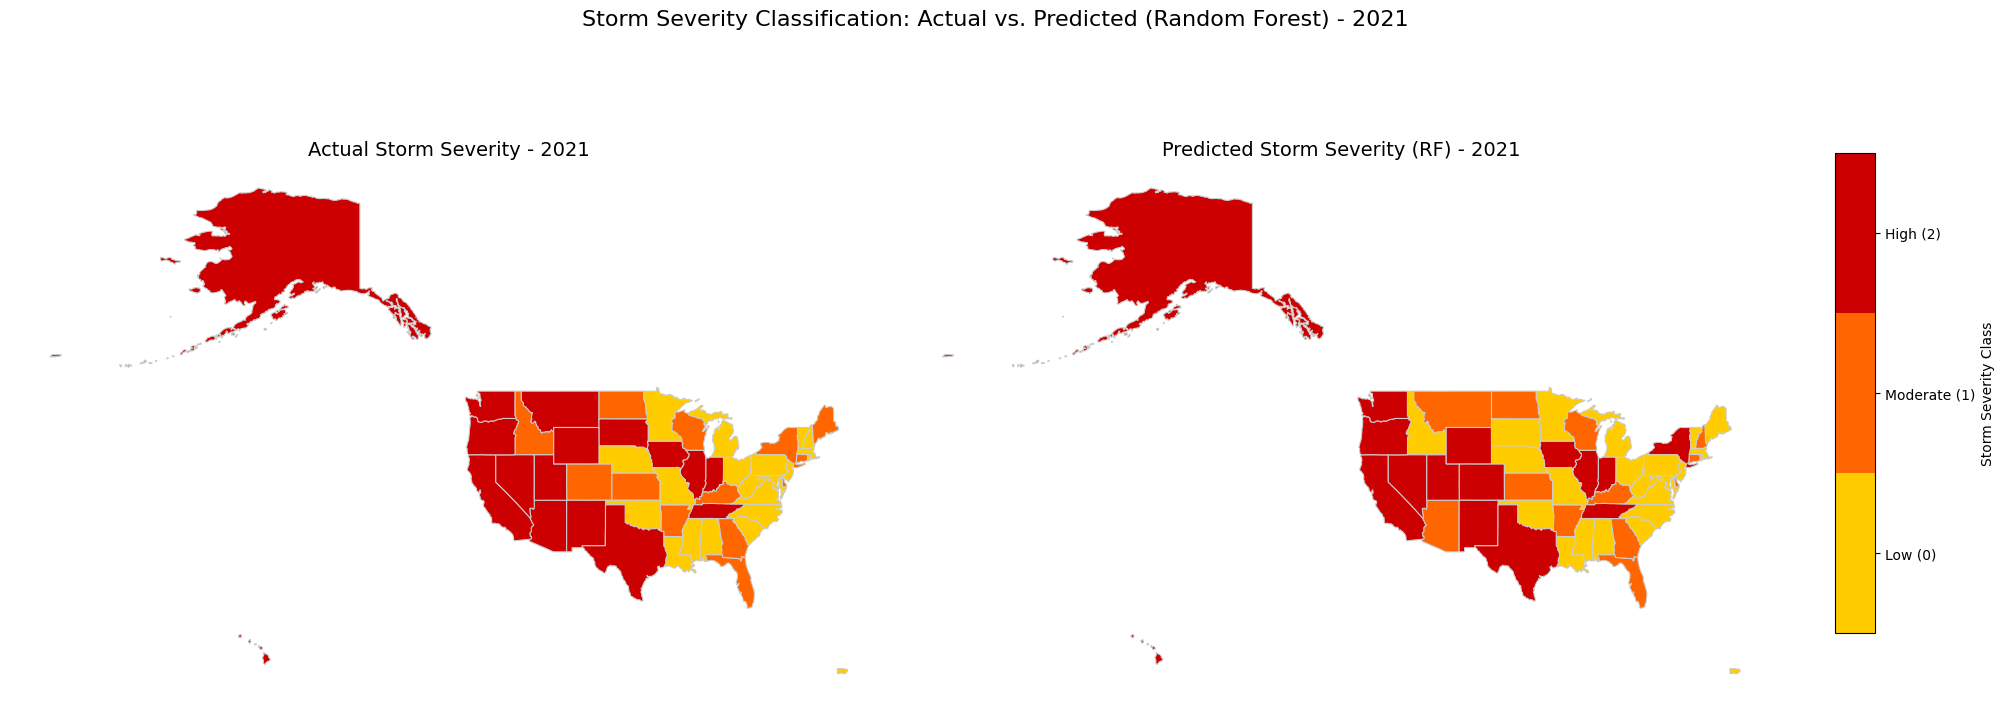

Creating map for year 2022...


<ipython-input-13-fb4fdf0af419>:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


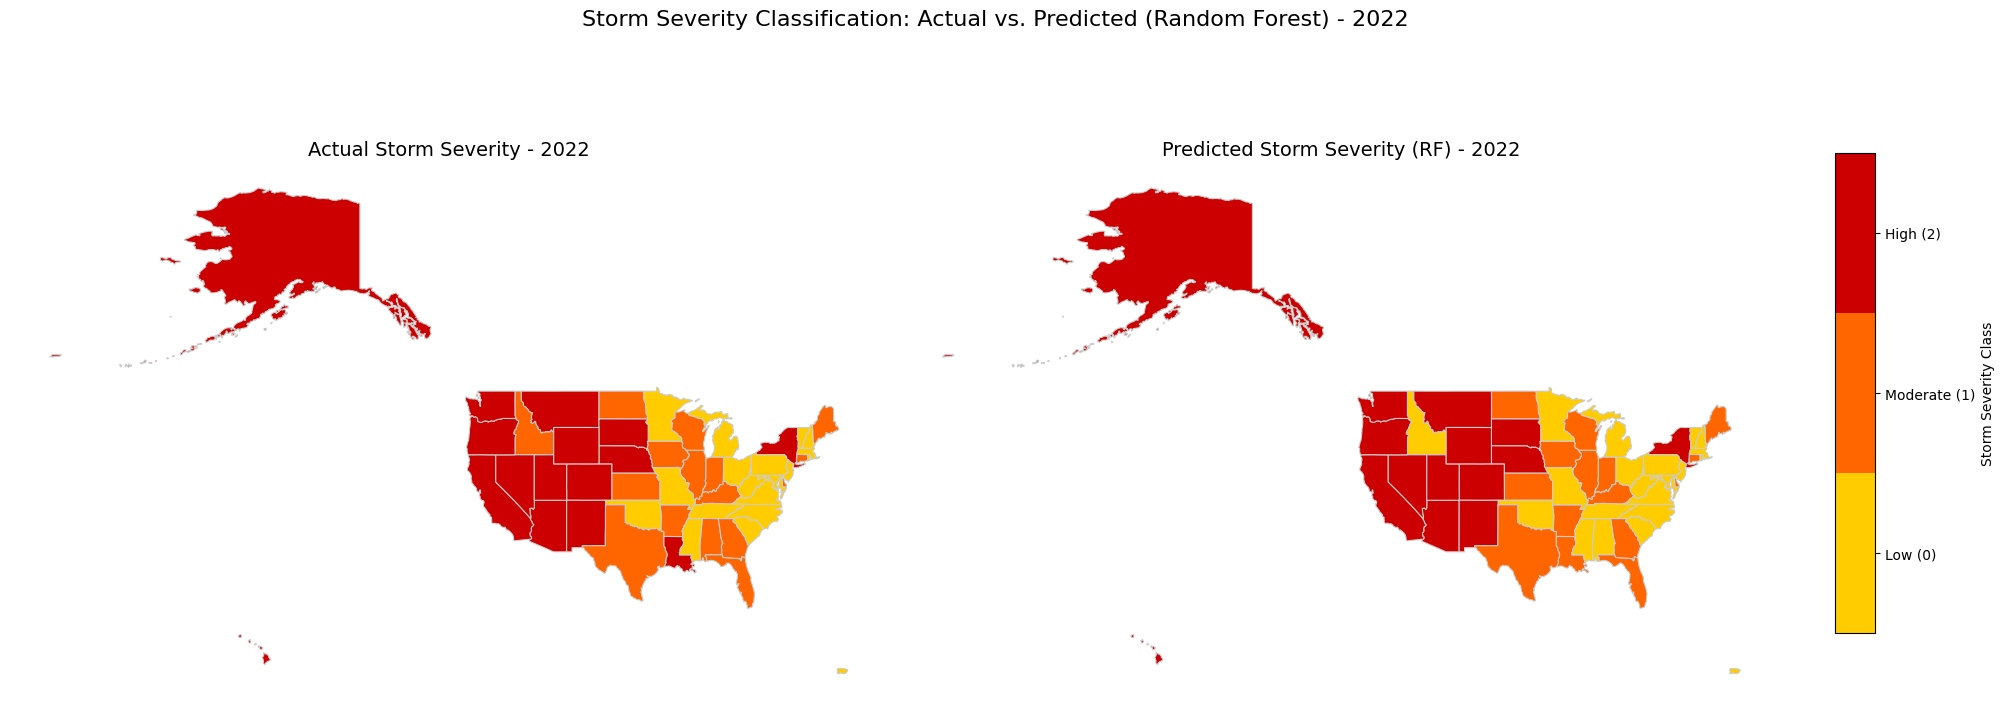

Creating map for year 2023...


<ipython-input-13-fb4fdf0af419>:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


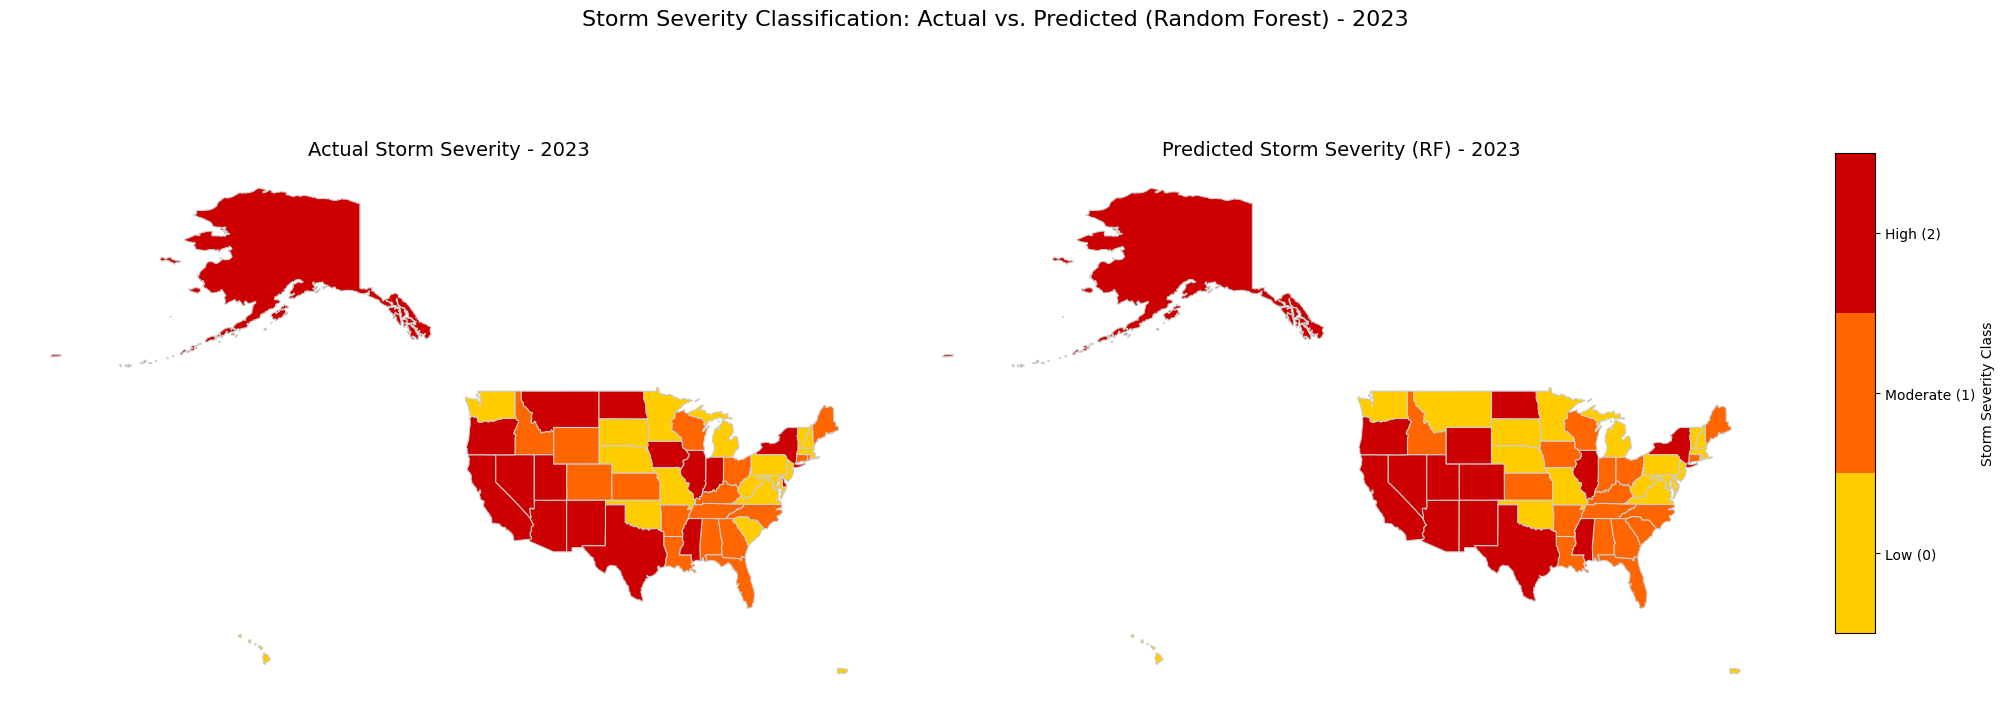

<ipython-input-13-fb4fdf0af419>:241: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


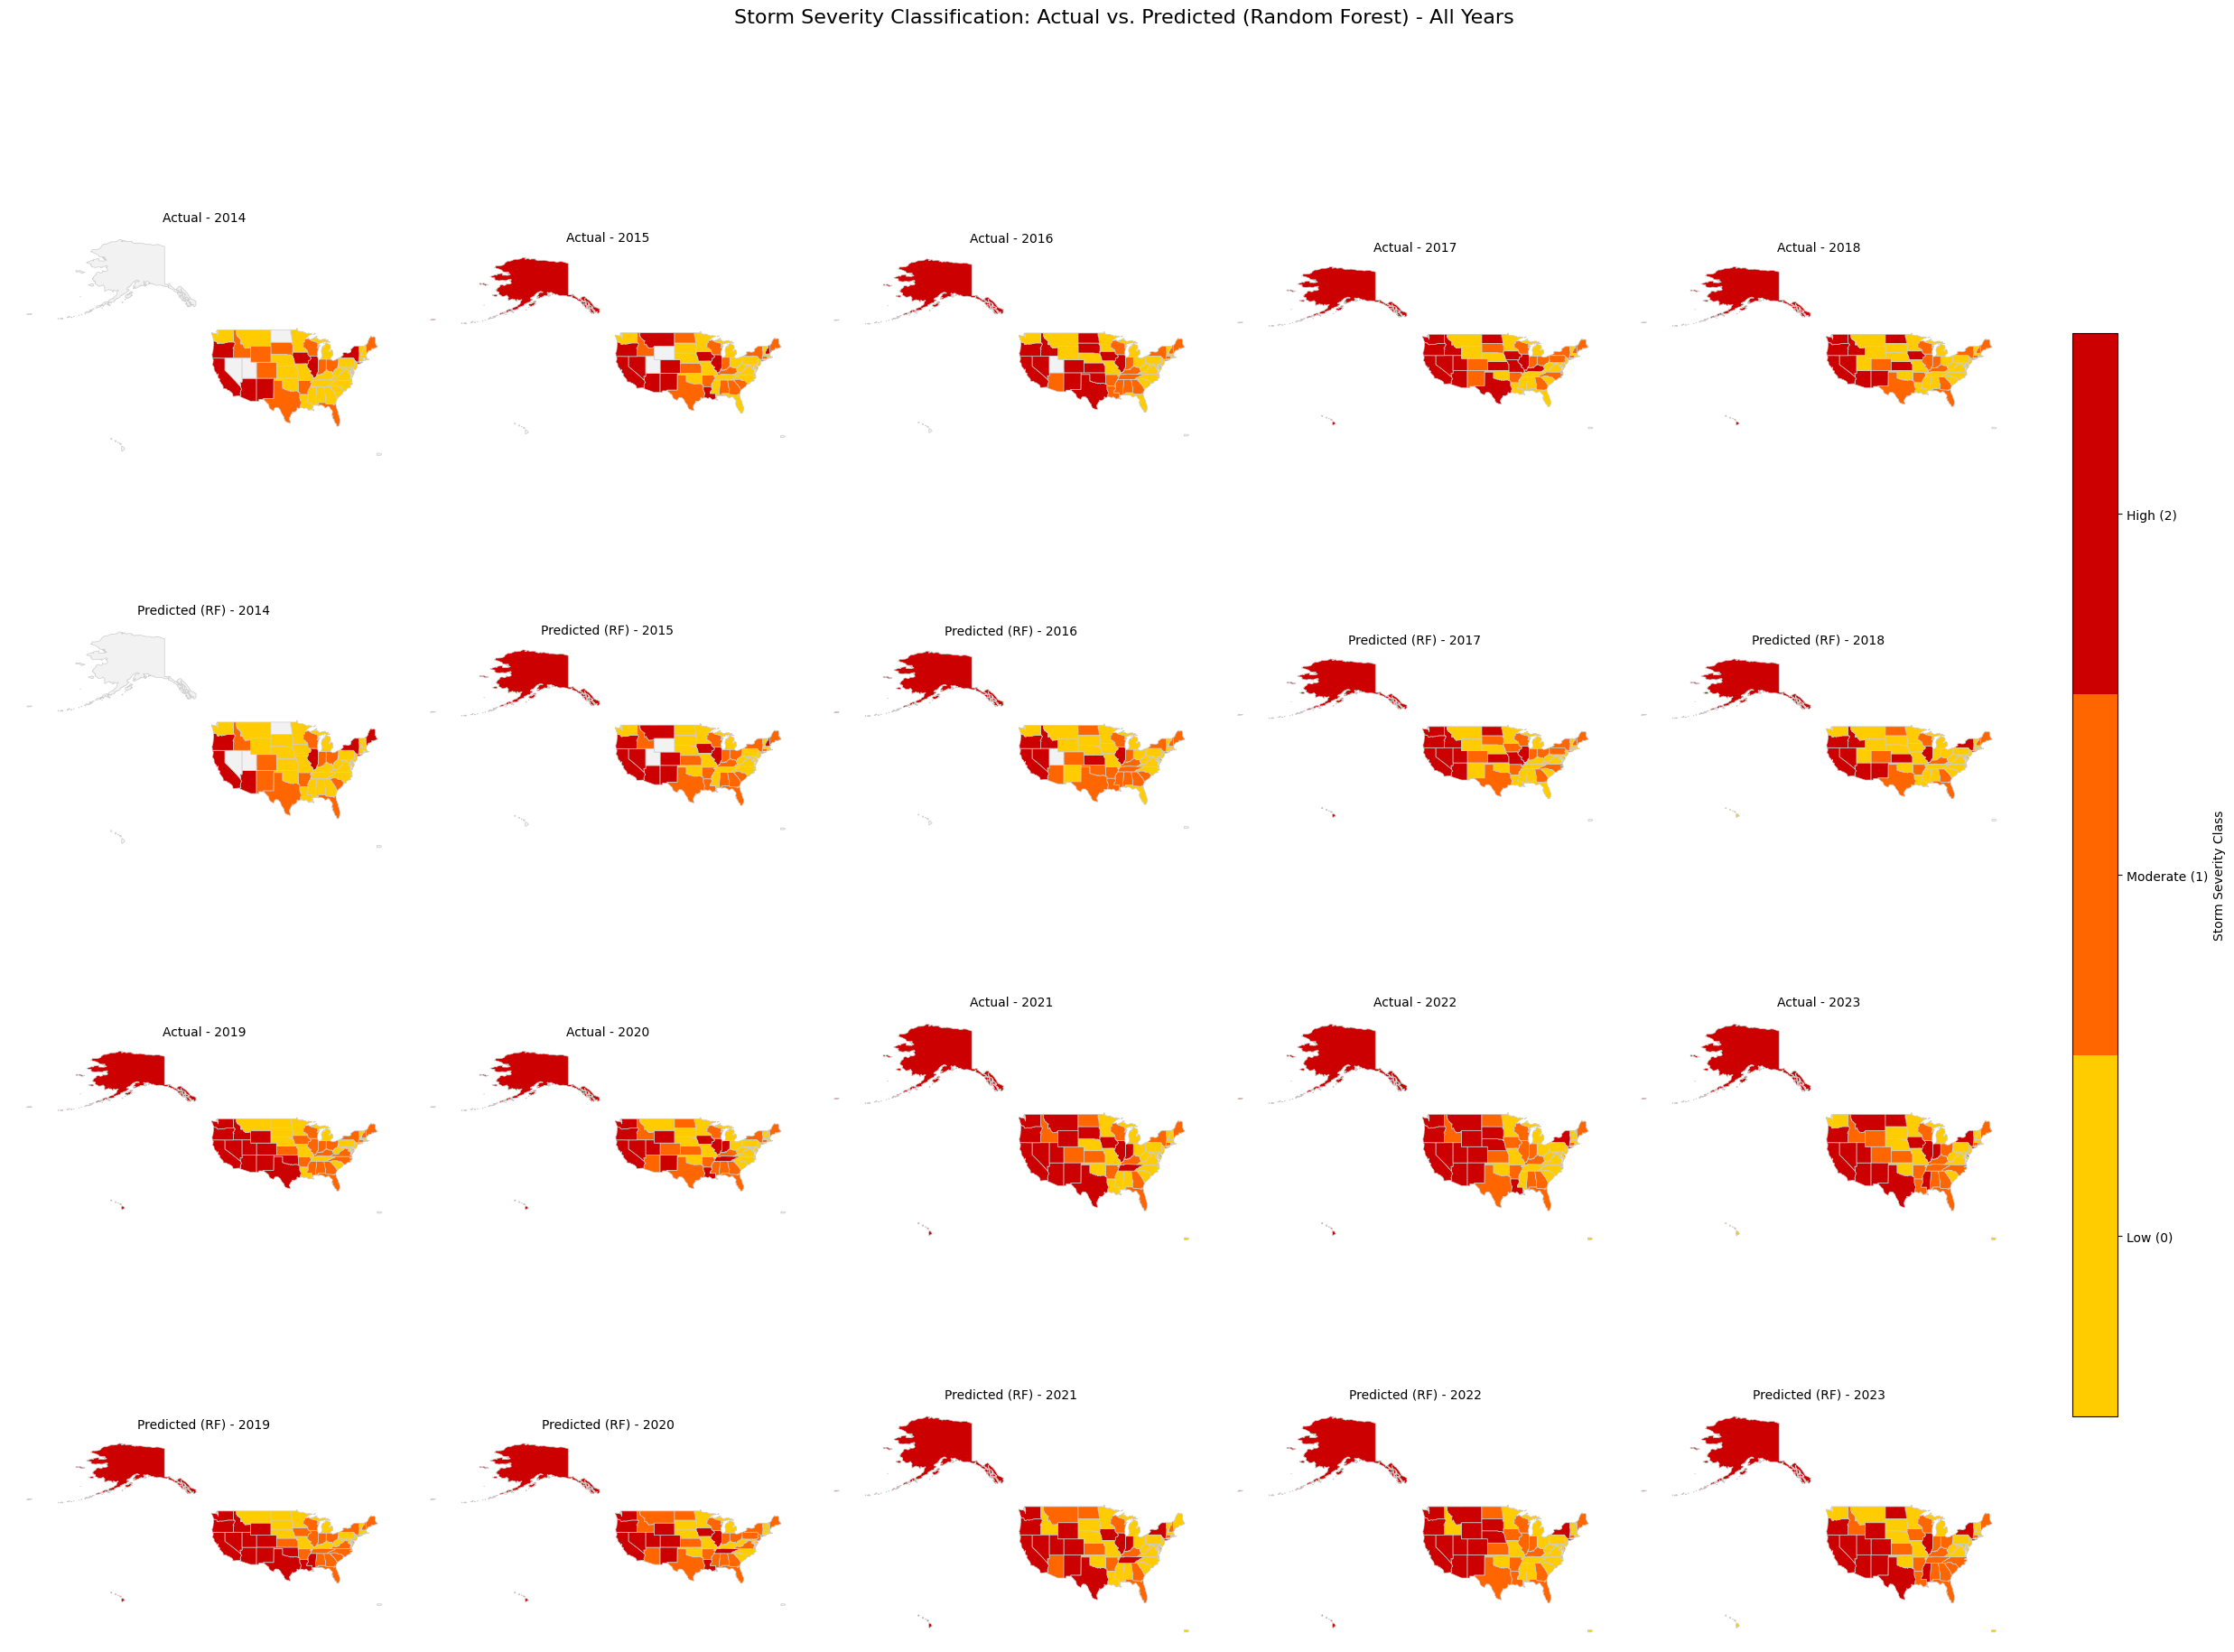

<ipython-input-13-fb4fdf0af419>:252: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  state_performance = storm_df_with_predictions.groupby('STATE').apply(



Random Forest Model Performance by State:
             STATE  accuracy
39     PUERTO RICO  0.958084
4       CALIFORNIA  0.913685
9          FLORIDA  0.902590
37          OREGON  0.877242
32        NEW YORK  0.871544
24     MISSISSIPPI  0.870645
10         GEORGIA  0.870071
21   MASSACHUSETTS  0.868372
33  NORTH CAROLINA  0.868108
47        VIRGINIA  0.865439


<Figure size 1200x800 with 0 Axes>

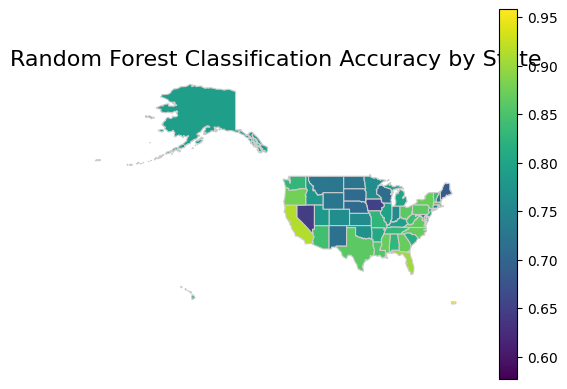

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.colors import ListedColormap
import numpy as np
"""
Task:
Visualize actual vs. predicted storm severity classifications across U.S. states by year using geospatial maps, and evaluate model performance by state.

Approach:
Extract years from `power_outage_datetime`, predict storm severity using a Random Forest model, and create side-by-side U.S. maps comparing actual and predicted severity classes for each year. Aggregate data by state, visualize all years in a single figure, and map classification accuracy by state.


"""

# First, extract the year from power_outage_datetime
if 'power_outage_datetime' in df.columns:
    df['YEAR'] = pd.to_datetime(df['power_outage_datetime']).dt.year
    print("Years extracted from power_outage_datetime:")
    print(df['YEAR'].value_counts().sort_index())
else:
    print("Column 'power_outage_datetime' not found. Available columns:")
    print(df.columns.tolist())

# Function to create US map visualizations
def plot_us_maps_comparison(data, year, actual_column, predicted_column, title):
    """
    Create side-by-side US maps comparing actual vs predicted values
    for a classification problem with 3 classes (0, 1, 2)
    """
    # Filter data for the specified year
    year_data = data[data['YEAR'] == year].copy()
    
    # Check if we have data for this year
    if len(year_data) == 0:
        print(f"No data available for year {year}")
        return
    
    # Load US states shapefile
    us_states = gpd.read_file('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json')
    
    # Convert state names to uppercase for consistent joining
    us_states['name'] = us_states['name'].str.upper()
    year_data['STATE'] = year_data['STATE'].str.upper()
    
    # Aggregate data by state (mode for categorical data - most common class)
    state_data = year_data.groupby('STATE').agg({
        actual_column: lambda x: x.mode()[0] if not x.empty else np.nan,
        predicted_column: lambda x: x.mode()[0] if not x.empty else np.nan
    }).reset_index()
    
    # Merge geographic data with our aggregated data
    merged_actual = us_states.merge(state_data, left_on='name', right_on='STATE', how='left')
    
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Create a custom colormap for categorical data (3 classes)
    colors = ['#f2f2f2', '#ffcc00', '#ff6600', '#cc0000']  # Adding extra light color for NaN
    cmap = ListedColormap(colors[1:])  # Exclude the first color (for NaN)
    
    # Set up fixed bounds for the colorbar for consistency
    bounds = [-0.5, 0.5, 1.5, 2.5]  # Boundaries for 0, 1, 2
    norm = plt.Normalize(-0.5, 2.5)
    
    # Plot actual data
    merged_actual.plot(column=actual_column, cmap=cmap, linewidth=0.8, ax=ax1, 
                      edgecolor='0.8', missing_kwds={'color': '#f2f2f2'})
    ax1.set_title(f'Actual Storm Severity - {year}', fontsize=14)
    ax1.axis('off')
    
    # Plot predicted data
    merged_actual.plot(column=predicted_column, cmap=cmap, linewidth=0.8, ax=ax2, 
                      edgecolor='0.8', missing_kwds={'color': '#f2f2f2'})
    ax2.set_title(f'Predicted Storm Severity (RF) - {year}', fontsize=14)
    ax2.axis('off')
    
    # Add a colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm._A = []
    cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
    cbar = fig.colorbar(sm, cax=cbar_ax, boundaries=bounds, ticks=[0, 1, 2])
    cbar.set_ticklabels(['Low (0)', 'Moderate (1)', 'High (2)'])
    cbar.set_label('Storm Severity Class')
    
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 0.9, 0.95])
    plt.show()

# Also add year to storm_df if not already there
if 'YEAR' not in storm_df.columns and 'power_outage_datetime' in storm_df.columns:
    storm_df['YEAR'] = pd.to_datetime(storm_df['power_outage_datetime']).dt.year

# Create a copy of our storm dataframe to add predictions
storm_df_with_predictions = storm_df.copy()

# Use the Random Forest model to predict on all storm data
X_all = storm_df[features]
X_all_scaled = scaler.transform(X_all)

# Get Random Forest predictions
storm_df_with_predictions['predicted_severity'] = rf.predict(X_all_scaled)

# Let's convert both actual and predicted to the same scale for visualization
storm_df_with_predictions['actual_severity'] = storm_df_with_predictions['severity_class']

# Create a more descriptive mapping for the classes
class_mapping = {0: 'Low', 1: 'Moderate', 2: 'High'}
storm_df_with_predictions['severity_label'] = storm_df_with_predictions['severity_class'].map(class_mapping)
storm_df_with_predictions['predicted_label'] = storm_df_with_predictions['predicted_severity'].map(class_mapping)

# Check if we have a STATE column
if 'STATE' not in storm_df_with_predictions.columns:
    print("STATE column not found. Looking for alternative geographic columns:")
    geographic_columns = [col for col in storm_df_with_predictions.columns if any(
        term in col.upper() for term in ['STATE', 'LOCATION', 'REGION', 'AREA', 'COUNTY'])]
    print(f"Potential geographic columns: {geographic_columns}")
    
    # If we find a state-like column, use it
    if geographic_columns:
        print(f"Using {geographic_columns[0]} as STATE")
        storm_df_with_predictions['STATE'] = storm_df_with_predictions[geographic_columns[0]]
    else:
        print("No geographic column found. Cannot create map visualizations.")
        # Create a placeholder STATE column with a constant value for demo purposes
        print("Creating placeholder STATE column for demonstration only")
        storm_df_with_predictions['STATE'] = 'DEMO_STATE'

# Print summary of prediction results
print("\nPrediction Summary:")
print("Actual vs Predicted Counts:")
print(pd.crosstab(storm_df_with_predictions['actual_severity'], 
                 storm_df_with_predictions['predicted_severity'],
                 rownames=['Actual'], colnames=['Predicted']))

print("\nAccuracy:", accuracy_score(storm_df_with_predictions['actual_severity'], 
                                   storm_df_with_predictions['predicted_severity']))

# Get unique years from the data
years = sorted(storm_df_with_predictions['YEAR'].unique())
print(f"Years in the dataset: {years}")

# Create individual year comparisons
for year in years:
    print(f"Creating map for year {year}...")
    plot_us_maps_comparison(
        storm_df_with_predictions, 
        year, 
        'actual_severity', 
        'predicted_severity', 
        f'Storm Severity Classification: Actual vs. Predicted (Random Forest) - {year}'
    )

# Create a single figure with all years side by side
def plot_all_years_comparison(data, years, actual_column, predicted_column):
    """
    Create a single figure with all years comparisons for categorical data
    """
    n_years = len(years)
    
    
    max_cols = 5  # Maximum columns before wrapping
    n_rows = (n_years + max_cols - 1) // max_cols  # Ceiling division
    n_cols = min(n_years, max_cols)
    
    if n_years > max_cols:
        
        fig, axes = plt.subplots(n_rows * 2, n_cols, figsize=(5*n_cols, 5*n_rows*2))
        # Reshape for easier indexing
        axes = axes.reshape(n_rows*2, n_cols)
    else:
        # Single row for actual and one for predicted
        fig, axes = plt.subplots(2, n_years, figsize=(5*n_years, 10))
    
    # Load US states shapefile
    us_states = gpd.read_file('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json')
    us_states['name'] = us_states['name'].str.upper()
    
    # Create a custom colormap for categorical data (3 classes)
    colors = ['#f2f2f2', '#ffcc00', '#ff6600', '#cc0000']  # Extra light color for NaN
    cmap = ListedColormap(colors[1:])  # Exclude the first color (for NaN)
    
    # Set up fixed bounds for the colorbar
    bounds = [-0.5, 0.5, 1.5, 2.5]  # Boundaries for 0, 1, 2
    norm = plt.Normalize(-0.5, 2.5)
    
    for i, year in enumerate(years):
        # Calculate row and column positions
        if n_years > max_cols:
            row_actual = (i // n_cols) * 2  # Even rows for actual
            row_pred = row_actual + 1       # Odd rows for predicted
            col = i % n_cols
        else:
            row_actual = 0  # First row for actual
            row_pred = 1    # Second row for predicted
            col = i
        
        year_data = data[data['YEAR'] == year].copy()
        
        if len(year_data) == 0:
            continue
            
        year_data['STATE'] = year_data['STATE'].str.upper()
        
        # Aggregate data by state (use mode for categorical data)
        state_data = year_data.groupby('STATE').agg({
            actual_column: lambda x: x.mode()[0] if not x.empty else np.nan,
            predicted_column: lambda x: x.mode()[0] if not x.empty else np.nan
        }).reset_index()
        
        # Merge with geographic data
        merged = us_states.merge(state_data, left_on='name', right_on='STATE', how='left')
        
        # Plot actual data
        if n_years > max_cols:
            ax_actual = axes[row_actual, col]
            ax_pred = axes[row_pred, col]
        else:
            ax_actual = axes[row_actual, col]
            ax_pred = axes[row_pred, col]
        
        merged.plot(column=actual_column, cmap=cmap, linewidth=0.5, ax=ax_actual, 
                   edgecolor='0.8', missing_kwds={'color': '#f2f2f2'})
        ax_actual.set_title(f'Actual - {year}', fontsize=10)
        ax_actual.axis('off')
        
        # Plot predicted data
        merged.plot(column=predicted_column, cmap=cmap, linewidth=0.5, ax=ax_pred, 
                   edgecolor='0.8', missing_kwds={'color': '#f2f2f2'})
        ax_pred.set_title(f'Predicted (RF) - {year}', fontsize=10)
        ax_pred.axis('off')
    
    # Hide any unused subplots
    if n_years > max_cols:
        for i in range(n_years, n_rows * n_cols):
            row = (i // n_cols) * 2
            col = i % n_cols
            if row < axes.shape[0] and col < axes.shape[1]:
                axes[row, col].axis('off')
                axes[row+1, col].axis('off')
    
    # Add a colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm._A = []
    cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
    cbar = fig.colorbar(sm, cax=cbar_ax, boundaries=bounds, ticks=[0, 1, 2])
    cbar.set_ticklabels(['Low (0)', 'Moderate (1)', 'High (2)'])
    cbar.set_label('Storm Severity Class')
    
    plt.suptitle('Storm Severity Classification: Actual vs. Predicted (Random Forest) - All Years', fontsize=16)
    plt.tight_layout(rect=[0, 0, 0.9, 0.95])
    plt.show()

# Create the all-years visualization
try:
    plot_all_years_comparison(storm_df_with_predictions, years, 'actual_severity', 'predicted_severity')
except Exception as e:
    print(f"Error creating all-years visualization: {e}")

# Let's also add a simple metric to evaluate the performance by state
try:
    state_performance = storm_df_with_predictions.groupby('STATE').apply(
        lambda x: accuracy_score(x['actual_severity'], x['predicted_severity'])
    ).reset_index(name='accuracy')

    print("\nRandom Forest Model Performance by State:")
    print(state_performance.sort_values('accuracy', ascending=False).head(10))

    # Plot a map of the accuracy by state
    us_states = gpd.read_file('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json')
    us_states['name'] = us_states['name'].str.upper()
    state_performance['STATE'] = state_performance['STATE'].str.upper()
    merged_accuracy = us_states.merge(state_performance, left_on='name', right_on='STATE', how='left')

    plt.figure(figsize=(12, 8))
    merged_accuracy.plot(column='accuracy', cmap='viridis', linewidth=0.8, edgecolor='0.8', legend=True)
    plt.title('Random Forest Classification Accuracy by State', fontsize=16)
    plt.axis('off')
    plt.show()
except Exception as e:
    print(f"Error calculating state performance: {e}")